In [1]:
%matplotlib inline
import control as co
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Compensador proporcional

- Adicionar um compensador proporcional implica em adicionar um zero no sistema.
- Porém devido a forma com que a FTMF é construída (CG / 1 + CG), nem todos os efeitos de adicionar um zero se repetem.
- kp alto introduz oscilações no caso sub amortecido, criticamente amortecido e sobreamortecido (com menor efeito).
- kp alto acelera sistemas sobre amortecidos.

In [2]:
wn = 5
zeta = 0.3
kp = 0.3

In [3]:
G = co.TransferFunction([wn**2], [1, 2*zeta*wn, 0])

In [4]:
G


    25
---------
s^2 + 3 s

In [5]:
C = co.TransferFunction([kp], [1])

In [6]:
C


0.3
---
 1

In [7]:
FTMF = C*G / (1 + C*G)

In [8]:
FTMF


        7.5 s^2 + 22.5 s
-------------------------------
s^4 + 6 s^3 + 16.5 s^2 + 22.5 s

In [9]:
interval = np.linspace(0, 10, 10000)
t, y = co.step_response(FTMF, interval)

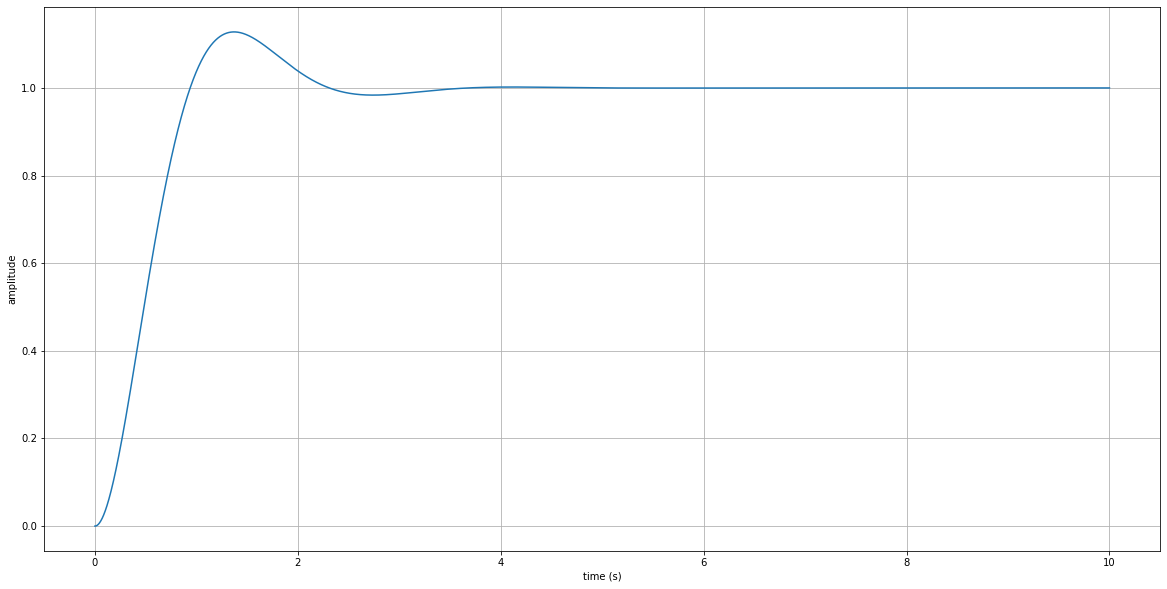

In [10]:
# Resposta ao degrau
plt.plot(t, y)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.grid()

In [11]:
error = 1 - y

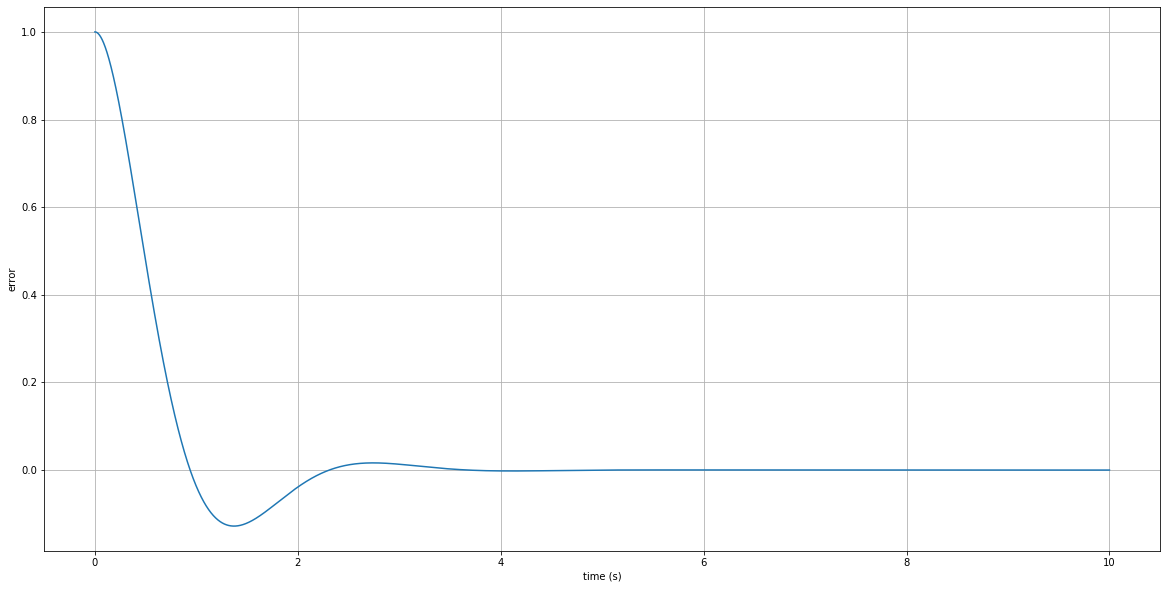

In [12]:
# Erro
plt.plot(t, error)
plt.xlabel("time (s)")
plt.ylabel("error")
plt.grid()